Digite o tamanho da matriz (ex: 3 para 3x3): 3

📥 Preenchendo a matriz A:
a11: 10
a12: 1
a13: 1
a21: 1
a22: 10
a23: 1
a31: 1
a32: 1
a33: 10

📥 Preenchendo o vetor b:
b1: 12
b2: 12
b3: 12

📏 Digite o erro relativo percentual aproximado (em %): 5
🔁 Digite o número máximo de iterações: 10

✅ A matriz é diagonal dominante (boa chance de convergência).

🔁 Iterações do método de Jacobi:
Iteração 1: x = ['1.20000000', '1.20000000', '1.20000000'], Erro = 100.000000%
Iteração 2: x = ['0.96000000', '0.96000000', '0.96000000'], Erro = 25.000000%
Iteração 3: x = ['1.00800000', '1.00800000', '1.00800000'], Erro = 4.761905%
Iteração 4: x = ['0.99840000', '0.99840000', '0.99840000'], Erro = 0.961538%
Iteração 5: x = ['1.00032000', '1.00032000', '1.00032000'], Erro = 0.191939%
Iteração 6: x = ['0.99993600', '0.99993600', '0.99993600'], Erro = 0.038402%

✅ Convergência alcançada!

📌 Solução aproximada final com 8 casas decimais:
x1 = 0.99993600
x2 = 0.99993600
x3 = 0.99993600

🔍 Verificação A * x:
[11.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


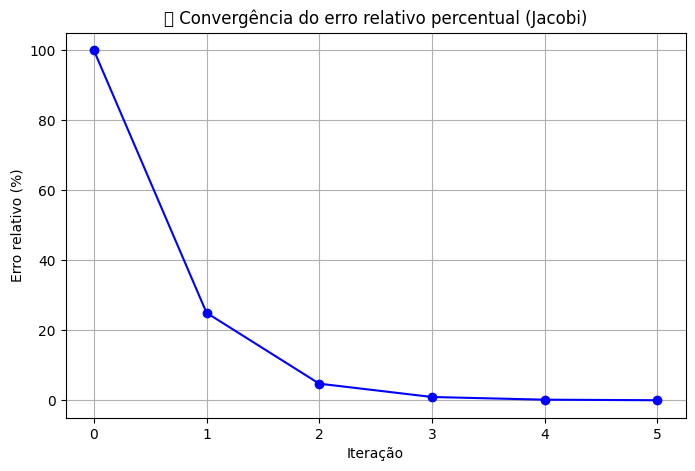

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def verificar_diagonal_dominante(A):
    n = A.shape[0]
    for i in range(n):
        soma = sum(abs(A[i][j]) for j in range(n) if j != i)
        if abs(A[i][i]) < soma:
            return False
    return True

def jacobi(A, b, x0=None, tol=1e-5, max_iter=100):
    n = len(A)
    x = np.zeros_like(b) if x0 is None else x0.astype(float)
    x_antigo = x.copy()

    erros = []
    print("\n🔁 Iterações do método de Jacobi:")
    for k in range(max_iter):
        for i in range(n):
            s = sum(A[i][j] * x_antigo[j] for j in range(n) if j != i)
            x[i] = (b[i] - s) / A[i][i]

        erro = np.max(np.abs((x - x_antigo) / x) * 100)
        erros.append(erro)

        print(f"Iteração {k+1}: x = {[f'{xi:.8f}' for xi in x]}, Erro = {erro:.6f}%")

        if erro < tol:
            print("\n✅ Convergência alcançada!")
            break

        x_antigo = x.copy()

    return x, erros

def entrada_matriz_jacobi():
    n = int(input("Digite o tamanho da matriz (ex: 3 para 3x3): "))
    A = np.zeros((n, n))
    b = np.zeros(n)

    print("\n📥 Preenchendo a matriz A:")
    for i in range(n):
        for j in range(n):
            A[i][j] = float(input(f"a{i+1}{j+1}: "))

    print("\n📥 Preenchendo o vetor b:")
    for i in range(n):
        b[i] = float(input(f"b{i+1}: "))

    tol_percentual = float(input("\n📏 Digite o erro relativo percentual aproximado (em %): "))
    max_iter = int(input("🔁 Digite o número máximo de iterações: "))

    return A, b, tol_percentual, max_iter

def plotar_erro_convergencia(erros):
    plt.figure(figsize=(8, 5))
    plt.plot(erros, marker='o', linestyle='-', color='blue')
    plt.title("📉 Convergência do erro relativo percentual (Jacobi)")
    plt.xlabel("Iteração")
    plt.ylabel("Erro relativo (%)")
    plt.grid(True)
    plt.show()

# Execução principal
A, b, tol_percentual, max_iter = entrada_matriz_jacobi()

# Verificação do critério de diagonal dominante
if verificar_diagonal_dominante(A):
    print("\n✅ A matriz é diagonal dominante (boa chance de convergência).")
else:
    print("\n⚠️ A matriz NÃO é diagonal dominante. O método pode não convergir!")

x_aprox, erros = jacobi(A, b, tol=tol_percentual / 100, max_iter=max_iter)

# Mostrar solução final
print("\n📌 Solução aproximada final com 8 casas decimais:")
for i, xi in enumerate(x_aprox):
    print(f"x{i+1} = {xi:.8f}")

# Verificação final
print("\n🔍 Verificação A * x:")
Ax = A @ x_aprox
print(np.round(Ax, 8))

print("\n🔍 Vetor b original:")
print(np.round(b, 8))

# Plotar gráfico de erro
plotar_erro_convergencia(erros)
